In [1]:
#mecab,janomeのインストール

!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7
!pip install janome
!pip install gensim  

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

In [48]:
import pandas as pd
import re
from janome.tokenizer import Tokenizer
import requests 
from bs4 import BeautifulSoup
from gensim.models import word2vec
from gensim import corpora
import matplotlib.pyplot as plt
from wordcloud import WordCloud


df = pd.read_csv("/content/drive/My Drive/machine_learning/NLP/kana_nishino/kana_release_songs.csv")
df

,Unnamed: 0,Title,URL,text
0,0,I,https://www.uta-net.com/song/60914/,"Darling, I am here now. そばにいさせて最終バスも気にならないくらい寝..."
1,1,In Stereo,https://www.uta-net.com/song/60915/,"It's kinda frightening, but kinda good.My body..."
2,2,Just a friend,https://www.uta-net.com/song/60916/,After school 誰もいない教室一日はInstantなみに過ぎ去ったああでもないこう...
3,3,glowly days,https://www.uta-net.com/song/63623/,いま風に抱かれ キミのもとへ吹いていけたらいいのにね。名前をつぶやいた 聞こえるかな?新しい...
4,4,celtic,https://www.uta-net.com/song/63624/,週末会いに行くねその日が待ち遠しく何日も前から荷物つめて何時間かゆられキミの新しい街へ二人暮...
...,...,...,...,...
168,168,Bedtime Story,https://www.uta-net.com/song/255414/,むかしむかし、あるところに、不器用な男の子と、少し気の強い女の子がいました。違う世界に住んで...
169,169,29,https://www.uta-net.com/song/258925/,最後の20代と意気込んでいたけれど何をしたら良いのやら分からず今日もハードワーク昔はとりあえ...
170,170,Mama,https://www.uta-net.com/song/258926/,ママ I love you誰よりも優しい人誰よりも勇気がある人ママ I love you私も...
171,171,Dear Santa,https://www.uta-net.com/song/258927/,親愛なるサンタさんへHow are you？ I'm good.今年はとってもいい子でしたい...


# 曲ごとにどのくらいの感情になっているのか分析を行ってみる。
# 西野カナに恋とは何なのか聞いてみる。


# janome練習


In [4]:
t = Tokenizer()
text = "震える君想うほど遠く感じてもう一度聞かせて嘘でもあの日のように"
t.tokenize(text)#tokennizeオブジェクトに格納される。

<generator object Tokenizer.__tokenize_stream at 0x7f28ba3f2258>

In [5]:
for i in t.tokenize(text):
    print(i)

震える	動詞,自立,*,*,一段,基本形,震える,フルエル,フルエル
君	名詞,代名詞,一般,*,*,*,君,キミ,キミ
想う	動詞,自立,*,*,五段・ワ行促音便,基本形,想う,オモウ,オモウ
ほど	助詞,副助詞,*,*,*,*,ほど,ホド,ホド
遠く	形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,遠い,トオク,トーク
感じ	動詞,自立,*,*,一段,連用形,感じる,カンジ,カンジ
て	助詞,接続助詞,*,*,*,*,て,テ,テ
もう一度	副詞,一般,*,*,*,*,もう一度,モウイチド,モーイチド
聞か	動詞,自立,*,*,五段・カ行イ音便,未然形,聞く,キカ,キカ
せ	動詞,接尾,*,*,一段,連用形,せる,セ,セ
て	助詞,接続助詞,*,*,*,*,て,テ,テ
嘘	名詞,一般,*,*,*,*,嘘,ウソ,ウソ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
も	助詞,係助詞,*,*,*,*,も,モ,モ
あの	連体詞,*,*,*,*,*,あの,アノ,アノ
日	名詞,非自立,副詞可能,*,*,*,日,ヒ,ヒ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
よう	名詞,非自立,助動詞語幹,*,*,*,よう,ヨウ,ヨー
に	助詞,副詞化,*,*,*,*,に,ニ,ニ


In [9]:
for i in t.tokenize(text):
    print('文字の表示')
    print(i.surface)
    print()
    print('品詞の表示')
    print(i.part_of_speech)
    print()
    print('品詞のみの表示')
    print(i.part_of_speech.split(',')[0])
    print()
    print('基本形の表示')
    print(i.base_form)
    break

文字の表示
震える

品詞の表示
動詞,自立,*,*

品詞のみの表示
動詞

基本形の表示
震える


In [13]:
#内包表記で文章を単語に分割したものをリストに格納
word_list = [token.surface for token in t.tokenize(text)]
print(len(word_list))
word_list

19


['震える',
 '君',
 '想う',
 'ほど',
 '遠く',
 '感じ',
 'て',
 'もう一度',
 '聞か',
 'せ',
 'て',
 '嘘',
 'で',
 'も',
 'あの',
 '日',
 'の',
 'よう',
 'に']

# 西野カナの曲を一つにまとめる。


In [17]:
kana_songs = ""
for kana_song in df["text"]:
    kana_songs += kana_song

In [20]:
kana_songs

"Darling, I am here now. そばにいさせて最終バスも気にならないくらい寝ても覚めても Do you always love me?ねぇ教えて1分1秒 (I always) feel restless.賭けて コケて 泣いて emotion 止められない 何故?涙 drop in a 未来のocean Ready to this hand ‘Escape’SOS!!I don't wanna know 埋め尽くしてよI don't wanna know キミのすべてI don't wanna know 代わりなんていないでしょ?I don't wanna know あの子の痕I don't wanna know 気になるんだI don't wanna know ずっとほどけないよう離さないで 離れないでどれほどの濃い愛を味わって今わたしを抱きしめてくれたのだろう知れば知るほど 傷ついていく?相性占い 人は弱い 先の見えないstrange引き devil 抜く?‘angel’保守 妄想Gate…I fall引き angel 抜け!‘devil’葛藤 Ready to this hand‘Escape’SOS!!I don't wanna know 埋め尽くしてよI don't wanna know キミのすべてI don't wanna know 代わりなんていないでしょ?I don't wanna know あの子の存在I don't wanna know 気になるんだI don't wanna know ここにつなぐための過去なのに 過去だけど明日が嫌になったら イエスタディ 巻き戻せる?I don't wanna know どんな不安もI don't wanna know 見つめているよI don't wanna know 消えることはないでしょ?I don't wanna know すべての痕I don't wanna know 埋め尽くしてよI don't wanna know ずっとほどけないよう離さないで 離れないでDarling, I am here now. I always love youIt's kinda frightening, but kinda good.My body's moving like I knew it

In [23]:
#テキストにして保存をしておく
with open('/content/drive/My Drive/machine_learning/NLP/kana_nishino/kashi.txt', mode = 'w', encoding = 'utf-8') as fw:
   fw.write(kana_songs)

In [25]:
#いらない文字を削除していく
import re
# 英数字の削除
kana_songs = re.sub("[a-xA-Z0-9_]","",kana_songs)
# 記号の削除
kana_songs = re.sub("[!-/:-@[-`{-~]","",kana_songs)
# 空白・改行の削除
kana_songs = re.sub(u'\n\n', '\n', kana_songs)
kana_songs = re.sub(u'\r', '', kana_songs)

escape = str.maketrans({"\n":'',"\t":'' , "y":'' , "…":'' , '？' : '' , '！':'',
                        '★':"",'・':'',"「":'' , "」":'' ,"“":'' , "”":'',"z":'' , "♪":'',' ':'' , ' ':'',
                        '’':'','、':'','。':'','‘':'','『':'','』':''})
kana_songs = kana_songs.translate(escape)
kana_songs

'     そばにいさせて最終バスも気にならないくらい寝ても覚めても  y y  ねぇ教えて分秒  y  賭けて コケて 泣いて  止められない 何故涙    未来の y    ‘’    埋め尽くしてよ    キミのすべて    代わりなんていないでしょ    あの子の痕    気になるんだ    ずっとほどけないよう離さないで 離れないでどれほどの濃い愛を味わって今わたしを抱きしめてくれたのだろう知れば知るほど 傷ついていく相性占い 人は弱い 先の見えない引き  抜く‘’保守 妄想… 引き  抜け‘’葛藤 y   ‘’    埋め尽くしてよ    キミのすべて    代わりなんていないでしょ    あの子の存在    気になるんだ    ここにつなぐための過去なのに 過去だけど明日が嫌になったら イエスタディ 巻き戻せる    どんな不安も    見つめているよ    消えることはないでしょ    すべての痕    埋め尽くしてよ    ずっとほどけないよう離さないで 離れないで      y  y     y y                       y                     y    y               y  y                y   y    y     y           y    y               y  y               y               y  y               y               y  y               y                  y y                誰もいない教室一日はなみに過ぎ去ったああでもないこうでもないジョーク交わしてキミとの距離間測ってるの  y   どこまで近づいていい     yもっとほら息がつまるほど抱きしめたいけど y  y 一人部屋の天井の星見上げる日は淋しくなるけど居眠りするキミの隣で y  y消しゴムで“  y”     こぼれだす気持ち喉の奥のほうまで詰め込んでいたら次に出す言葉は空振ってうまくとれなくなってく   y  y y  いつもどおりで y  y  yもっと本心素直なまま飛び込んでいきたいけど     y y 一人では折れてしまいそうでこの掌夜空に重ね

In [74]:
def delete_letter(text):
    # 英数字の削除
    text = re.sub("[a-xA-Z0-9_]","",text)
    # 記号の削除
    text = re.sub("[!-/:-@[-`{-~]","",text)
    # 空白・改行の削除
    text = re.sub(u'\n\n', '\n', text )
    text = re.sub(u'\r', '', text)

    escape = str.maketrans({"\n":'',"\t":'' , "y":'' , "…":'' , '？' : '' , '！':'',
                            '★':"",'・':'',"「":'' , "」":'' ,"“":'' , "”":'',"z":'' , "♪":'',' ':'' , ' ':'',
                            '’':'','、':'','。':'','‘':'','『':'','』':''})
    text = text.translate(escape)
    return text


In [76]:
song = delete_letter(df["text"][0])
tokenize(song)

['そば',
 'いる',
 'させる',
 '最終',
 'バス',
 'なる',
 '寝る',
 '覚める',
 '教える',
 '分秒',
 '賭ける',
 'コケる',
 '泣く',
 '止める',
 'られる',
 '何故',
 '涙',
 '未来',
 '埋める',
 '尽くす',
 'キミ',
 '代わり',
 'いる',
 '痕',
 'なる',
 'ん',
 'ずっと',
 'ほどける',
 '離す',
 '離れる',
 '濃い',
 '愛',
 '味わう',
 '抱きしめる',
 'くれる',
 'の',
 '知る',
 '知る',
 '傷つく',
 'いく',
 '相性',
 '占い',
 '弱い',
 '見える',
 '引き抜く',
 '保守',
 '妄想',
 '引き抜ける',
 '葛藤',
 '埋める',
 '尽くす',
 'キミ',
 '代わり',
 'いる',
 '存在',
 'なる',
 'ん',
 'つなぐ',
 '過去',
 '過去',
 '明日',
 '嫌',
 'なる',
 'イエスタディ',
 '巻き',
 '戻せる',
 '不安',
 '見つめる',
 'いる',
 '消える',
 '痕',
 '埋める',
 '尽くす',
 'ずっと',
 'ほどける',
 '離す',
 '離れる']

In [49]:
#ストプワードのリストを作成。
url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
res = requests.get(url)
soup = BeautifulSoup(res.text , "html.parser")
stop_word = str(soup).split()

In [46]:
# 形態素解析を行っていく関数作成

def tokenize(text):
    word_list = []
    t = Tokenizer()#インスタンス化
    #形態素解析を行う準備
    tokens = t.tokenize(text)

    for  token in tokens:
        #各単語が ["動詞" , "形容詞" , "名詞","形容動詞","副詞"]であれば単語リストに入れる。
        if token.part_of_speech.split(',')[0] in ["動詞" , "形容詞" , "名詞","形容動詞","副詞"]:
            #ストップワードは個々で取り除く
            if token.base_form not in stop_word:
                word_list.append(token.base_form)
    return word_list

In [64]:
sentence = [tokenize(kana_songs)]
#sizeはベクトルの次元数,min_countはn回未満登場する単語を破棄、window、学習に使用する前後の単語の数
model = word2vec.Word2Vec(sentence, size=200, min_count=4, window=4, iter=50)

In [71]:
print(model.wv.most_similar(positive=[u"友達"], topn=20))

[('良い', 0.9227012991905212), ('大事', 0.9049617648124695), ('分かる', 0.8935405015945435), ('考える', 0.8933597207069397), ('ケンカ', 0.8819887638092041), ('もうでる', 0.8819261789321899), ('いい', 0.8733452558517456), ('ワガママ', 0.8671122789382935), ('淋しい', 0.8637037873268127), ('どう', 0.8613190650939941), ('型', 0.8590149879455566), ('大人', 0.8588998317718506), ('恋人', 0.8530901670455933), ('中身', 0.8513516187667847), ('嫌い', 0.850906252861023), ('そんなに', 0.8417314291000366), ('本', 0.8414862155914307), ('必要', 0.8378965258598328), ('無い', 0.8368815779685974), ('怒る', 0.8360964059829712)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [72]:
#極性辞書を使用した感情分析。

pn_df = pd.read_csv('/content/drive/My Drive/machine_learning/NLP/kana_nishino/pn_ja.csv', encoding='utf-8', names=('Word','Reading','POS', 'PN'))
word_list = list(pn_df['Word'])
pn_list   = list(pn_df['PN'])

#pn_dictとしてword_list, pn_listを格納した辞書を作成してください。
pn_dict   = dict(zip(word_list, pn_list))

{'優れる': 1.0,
 '良い': 0.9999950000000001,
 '喜ぶ': 0.9999790000000001,
 '褒める': 0.9999790000000001,
 'めでたい': 0.9996450000000001,
 '賢い': 0.9994860000000001,
 '善い': 0.9993139999999999,
 '適す': 0.999295,
 '天晴': 0.999267,
 '祝う': 0.999122,
 '功績': 0.9991040000000001,
 '賞': 0.998943,
 '嬉しい': 0.998871,
 '喜び': 0.9988610000000001,
 '才知': 0.998771,
 '徳': 0.9987450000000001,
 '才能': 0.998699,
 '素晴らしい': 0.998617,
 '芳しい': 0.9985780000000001,
 '称える': 0.998576,
 '適切': 0.9984059999999999,
 '崇める': 0.9983569999999999,
 '助ける': 0.9907020000000001,
 '抜きんでる': 0.9983559999999999,
 '清水': 0.98213,
 '雄雄しい': 0.9982719999999999,
 '仕合せ': 0.998208,
 '幸い': 0.997862,
 '吉兆': 0.9977950000000001,
 '秀でる': 0.997777,
 '宜しい': 0.997517,
 'きりりしゃんと': 0.997511,
 '矜持': 0.9889459999999999,
 '香しい': 0.9974379999999999,
 'しこなす': 0.997408,
 '遣りこなす': 0.9974059999999999,
 '優麗': 0.997337,
 '気高い': 0.997325,
 '手柄': 0.997308,
 '正義': 0.9972780000000001,
 '麗しい': 0.99726,
 '名高い': 0.997259,
 '感心': 0.997201,
 '誉れ': 0.9971979999999999,
 '卓説': 0.997194,


In [80]:
def pnvalue(word_list, pn_dict):
    pn_point_list = []
    for word in word_list:
        if word in pn_dict:
            pn = float(pn_dict[word])
            pn_point_list.append(pn) 
    return(pn_point_list)

In [107]:
#いらない文字を削除
song = delete_letter(df["text"][0])
#文章から単語リストの作成。
word_list = tokenize(song)
#ネガポジの単語ポイントを取得
pn = pnvalue(word_list, pn_dict)
#ネガポジの平均を算出
mean_pn_point = sum(pn) / len(pn)
mean_pn_point

-0.6106109589743589

In [95]:
word_list

[]

In [89]:
mean_list = []
for text in df["text"]:
    #いらない文字を削除
    song = delete_letter(text)
    #文章から単語リストの作成。
    word_list = tokenize(song)
    #ネガポジの単語ポイントを取得
    pn = pnvalue(word_list, pn_dict)
    #ネガポジの平均を算出
    if pn == []:
        mean_pn_point = 0
    else:
        mean_pn_point = sum(pn) / len(pn)
    mean_list.append(mean_pn_point)

df["pn_point"] = mean_list
df

,Unnamed: 0,Title,URL,text,pn_point
0,0,I,https://www.uta-net.com/song/60914/,"Darling, I am here now. そばにいさせて最終バスも気にならないくらい寝...",-0.610611
1,1,In Stereo,https://www.uta-net.com/song/60915/,"It's kinda frightening, but kinda good.My body...",0.000000
2,2,Just a friend,https://www.uta-net.com/song/60916/,After school 誰もいない教室一日はInstantなみに過ぎ去ったああでもないこう...,-0.683214
3,3,glowly days,https://www.uta-net.com/song/63623/,いま風に抱かれ キミのもとへ吹いていけたらいいのにね。名前をつぶやいた 聞こえるかな?新しい...,-0.540161
4,4,celtic,https://www.uta-net.com/song/63624/,週末会いに行くねその日が待ち遠しく何日も前から荷物つめて何時間かゆられキミの新しい街へ二人暮...,-0.709956
...,...,...,...,...,...
168,168,Bedtime Story,https://www.uta-net.com/song/255414/,むかしむかし、あるところに、不器用な男の子と、少し気の強い女の子がいました。違う世界に住んで...,-0.416823
169,169,29,https://www.uta-net.com/song/258925/,最後の20代と意気込んでいたけれど何をしたら良いのやら分からず今日もハードワーク昔はとりあえ...,-0.259689
170,170,Mama,https://www.uta-net.com/song/258926/,ママ I love you誰よりも優しい人誰よりも勇気がある人ママ I love you私も...,-0.119487
171,171,Dear Santa,https://www.uta-net.com/song/258927/,親愛なるサンタさんへHow are you？ I'm good.今年はとってもいい子でしたい...,-0.401308


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12387 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12418 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12387 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text

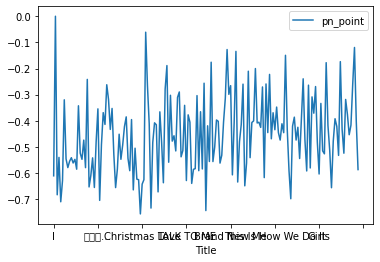

In [91]:
df.plot(y='pn_point' , x = "Title")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


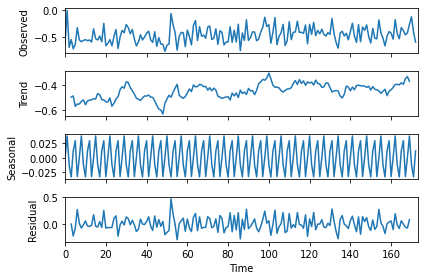

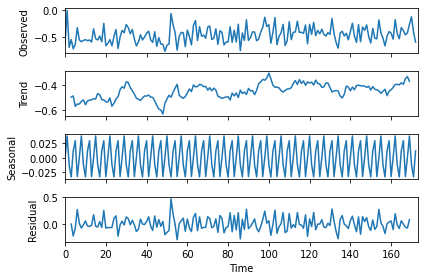

In [97]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df["pn_point"].values, freq=7)
res.plot()

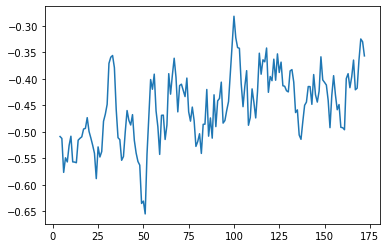

In [106]:
#移動平均
#右肩上がりになっている。
df["pn_point"].rolling(5).mean().plot()

0           NaN
1           NaN
2     -0.431275
3     -0.407792
4     -0.644444
         ...   
168   -0.415150
169   -0.376643
170   -0.265333
171   -0.260162
172   -0.369185
Name: pn_point, Length: 173, dtype: float64